# Imports

In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression

# Loading the Data 

In [2]:
student_data = pd.read_csv(r'C:\Users\Desktop\USF-DS\educationstats.csv')
student_data = student_data.drop(columns=['Country Name'])
student_data.head()

,Unnamed: 0,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Adj net enrollment of lower secondary,Tertiary educ enrollment(all programs)
0,0,1,17,5,171,1,1,122.0,1,19,...,0,0,0.000000,0,10.8,1.4,1.74,Dropout,85.185539,362200.0
1,1,1,15,1,9254,1,1,160.0,1,1,...,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,85.185539,362200.0
2,2,1,1,5,9070,1,1,122.0,1,37,...,0,0,0.000000,0,10.8,1.4,1.74,Dropout,85.185539,362200.0
3,3,1,17,2,9773,1,1,122.0,1,38,...,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,85.185539,362200.0
4,4,2,39,1,8014,0,1,100.0,1,37,...,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,85.185539,362200.0


###### Changing Target column values into numerical 

In [3]:
student_data['Target'] = student_data['Target'].replace(['Graduate'], '1')

In [4]:
student_data['Target'] = student_data['Target'].replace(['Dropout'], '0')

In [5]:
student_data['Target'] = student_data['Target'].replace(['Enrolled'], '2')

In [6]:
student_data.head()

,Unnamed: 0,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Adj net enrollment of lower secondary,Tertiary educ enrollment(all programs)
0,0,1,17,5,171,1,1,122.0,1,19,...,0,0,0.000000,0,10.8,1.4,1.74,0,85.185539,362200.0
1,1,1,15,1,9254,1,1,160.0,1,1,...,6,6,13.666667,0,13.9,-0.3,0.79,1,85.185539,362200.0
2,2,1,1,5,9070,1,1,122.0,1,37,...,0,0,0.000000,0,10.8,1.4,1.74,0,85.185539,362200.0
3,3,1,17,2,9773,1,1,122.0,1,38,...,10,5,12.400000,0,9.4,-0.8,-3.12,1,85.185539,362200.0
4,4,2,39,1,8014,0,1,100.0,1,37,...,6,6,13.000000,0,13.9,-0.3,0.79,1,85.185539,362200.0


# Train / Test Split 

### Spliting the dataset in to training and testing 

In [7]:
X_train,X_test,y_train,y_test = train_test_split(student_data.drop(columns='Target'),student_data.Target,test_size=0.3,random_state=47)

In [8]:
X_train.shape, X_test.shape

((3096, 39), (1328, 39))

In [9]:
y_train.shape, y_test.shape

((3096,), (1328,))

## Training the model 

### 1. Using Random Forest 

In [10]:
# Imports 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [11]:
# Creating random forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [12]:
y_pred = rf.predict(X_test)

In [13]:
accuracy_RF = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy_RF)

Accuracy Score: 0.7899096385542169


In [14]:
x_train_rf_pred = rf.predict(X_train)

In [17]:
training_rf_ac = accuracy_score(y_train, x_train_rf_pred)

In [18]:
print("Training Accuracy:", training_rf_ac )

Training Accuracy: 1.0


In [20]:
x_test_rf_pred = rf.predict(X_test)

In [21]:
testing_rf_ac = accuracy_score(y_test, x_test_rf_pred)

In [22]:
print("Testing Accuracy:", testing_rf_ac)

Testing Accuracy: 0.7899096385542169


###### Optimizing accuracy using  RandomizedSearchCV

In [23]:
# Paramters 
param_randomforest = {'n_estimators':[50,80,100,120,150],
                      'max_depth':[2,4,6,8]}

In [24]:
# Creating random forest classifier
rf = RandomForestClassifier()

# Using random search to find best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_randomforest , 
                                 n_iter=5, 
                                 cv=5)

# Fitting the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [2, 4, 6, 8],
                                        'n_estimators': [50, 80, 100, 120,
                                                         150]})

In [25]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  best_rf)

Best hyperparameters: RandomForestClassifier(max_depth=8, n_estimators=50)


In [26]:
X_train_pred_RF = rand_search.predict(X_train)

In [27]:
training_accuracy_RF = accuracy_score(y_train, X_train_pred_RF)

In [28]:
print("The training accuracy after Hyperparameter Tuning:", training_accuracy_RF)

The training accuracy after Hyperparameter Tuning: 0.8488372093023255


In [29]:
X_test_pred_RF = rand_search.predict(X_test)

In [30]:
testing_accuracy_RF =  accuracy_score(y_test, X_test_pred_RF)

In [31]:
print("The testing accurary after Hyperparameter Tuning:", testing_accuracy_RF)

The testing accurary after Hyperparameter Tuning: 0.7718373493975904


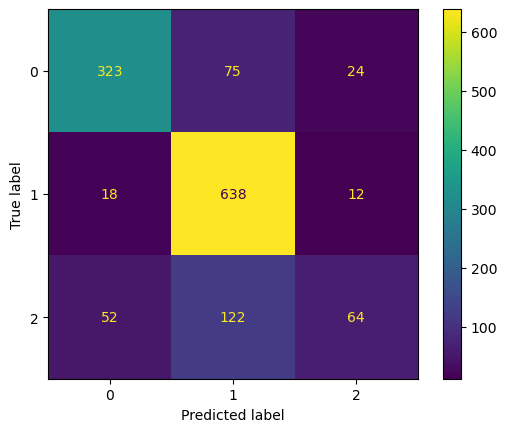

In [32]:
# Confusion matrix 
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### 2. Using Decision Tree

In [38]:
classifer = DecisionTreeClassifier()
classifer = classifer.fit(X_train,y_train)

In [39]:
y_pred = classifer.predict(X_test)

In [40]:
accuracy_DT = classifer.score(X_test, y_pred)
print('Accuracy Score:', accuracy_DT)

Accuracy Score: 1.0


In [41]:
x_train_DT_pred = classifer.predict(X_train)

In [42]:
training_DT_ac = accuracy_score(y_train, x_train_DT_pred)

In [43]:
print("Training Accuracy:", training_DT_ac)

Training Accuracy: 1.0


In [44]:
x_test_DT = classifer.predict(X_test)

In [48]:
testing_DT = accuracy_score(y_test, x_test_DT)

In [50]:
print("Testing Accuracy:", testing_DT)

Testing Accuracy: 0.670933734939759


###### Optimizing Accuracy with GridSearchCV

In [51]:
# Paramters 
param_decisiontree = {'max_depth':[2,4,6,8], 
                      'min_samples_leaf':[2,4,6,8],
                      'min_samples_split':[2,5,10,12]}

In [52]:
grid_search = GridSearchCV(classifer, param_grid=param_decisiontree , cv=5, n_jobs=-1)

In [53]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8],
                         'min_samples_leaf': [2, 4, 6, 8],
                         'min_samples_split': [2, 5, 10, 12]})

In [54]:
X_train_pred_DT = grid_search.predict(X_train)

In [55]:
training_accuracy_DT = accuracy_score(y_train, X_train_pred_DT)

In [57]:
print("The training accuracy after Hyperparameter Tuning:", training_accuracy_DT)

The training accuracy after Hyperparameter Tuning: 0.7548449612403101


In [58]:
X_test_pred_DT = grid_search.predict(X_test)

In [59]:
testing_accuracy_DT =  accuracy_score(y_test, X_test_pred_DT)

In [60]:
print("The testing accuracy after Hyperparameter Tuning", testing_accuracy_DT)

The testing accuracy after Hyperparameter Tuning 0.7424698795180723


# Pickle File 

In [61]:
with open('predict_student_dropout_academic_success.pkl', 'wb') as f:
    pickle.dump(rand_search, f)

# Summary 

The data was split by the 70:30 ratio. Initially, the Random Forest Classifier gave a testing accuracy rate of 78.9%. After optimizing using RandomizedSearchCV, the training accuracy was 84.8% and the test accuracy was 77.2%. Compared to the Random Forest Classifier, the Decision Tree produced a testing accuracy of 67.0%. After optimizing the result with GridSearchCV, the training accuracy was 75.5% and the test accuracy was 74.2%. Based on these results, the best model was the Random Forest Classifier after hyperparameter tuning.  
